In [1]:
# ToDo
# Quality control on events. Maybe only include in catalog if DeltaX on event

# Zachary Katz
# zachary_katz@mines.edu
# 22 December 2023

# PickEvents
# Kernel keeps crashing for such a large df. One way around this is to cut the
# pickle files off every few years so the data frame isnt so long.

# Thus change to years you want to analyze.


# Imports
import os


import pandas as pd
import numpy as np

In [1]:
import boto3

s3_resource = boto3.resource("s3")
object = s3_resource.Object("pytmd", "CATS2008/grid_CATS2008")

In [3]:
print(object.get())

NoCredentialsError: Unable to locate credentials

In [2]:
import src.Catalog.CatalogWrapper as CatWrap
import src.Catalog.Catalog as Catalog

dir = "./tests/ExamplePos"
stas = ["slw1", "la02"]
years = ["2010"]
max_gap_len = 120

cats = []
for sta in stas:
    interpolation_time, run = Catalog.set_interpolation_time(sta, years)
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    cat.findgaps(max_gap_len)
    cats.append(cat)
print(cats[0].data)
print(cats[1].data)

     longitude   latitude                time  day_of_year  elevation sats  \
0  -153.612206 -84.247340 2010-01-01 23:54:15     1.996019   91.74860   10   
1  -153.612207 -84.247340 2010-01-01 23:54:30     1.996181   91.79530    9   
2  -153.612207 -84.247340 2010-01-01 23:54:45     1.996366   91.83120    9   
3  -153.612207 -84.247340 2010-01-01 23:55:00     1.996528   91.79290    9   
4  -153.612208 -84.247340 2010-01-01 23:55:15     1.996713   91.81260    9   
5  -153.612208 -84.247340 2010-01-01 23:55:30     1.996875   91.81080    9   
6  -153.612208 -84.247340 2010-01-01 23:55:45     1.997060   91.79760    9   
7  -153.612208 -84.247340 2010-01-01 23:56:00     1.997222   91.80640    9   
8  -153.612208 -84.247340 2010-01-01 23:56:15     1.997407   91.82200    9   
9  -153.612208 -84.247340 2010-01-01 23:56:30     1.997569   91.80280    9   
10 -153.612207 -84.247340 2010-01-01 23:56:45     1.997755   91.80730    9   
11 -153.612208 -84.247340 2010-01-01 23:57:00     1.997917   91.

2010-01-01 23:54:15 2010-01-02 00:06:30
2010-01-01 00:00:00 2010-01-02 23:59:30
2010-12-30 00:00:00 2010-12-31 23:59:30
                times  onset station
0 2010-01-01 00:00:00   True    la02
1 2010-01-01 23:54:15   True    slw1
2 2010-01-02 00:06:15  False    slw1
3 2010-01-02 23:59:00  False    la02
4 2010-12-30 00:00:00   True    la02
5 2010-12-31 23:59:00  False    la02
                     time  slw1x  slw1y  slw1res          la02x  \
0     2010-01-01 00:00:00    NaN    NaN      NaN -290672.163038   
1     2010-01-01 00:00:30    NaN    NaN      NaN -290672.161603   
2     2010-01-01 00:01:00    NaN    NaN      NaN -290672.163568   
3     2010-01-01 00:01:30    NaN    NaN      NaN -290672.160907   
4     2010-01-01 00:02:00    NaN    NaN      NaN -290672.159225   
...                   ...    ...    ...      ...            ...   
11538 2010-12-31 23:57:00    NaN    NaN      NaN -290463.981963   
11539 2010-12-31 23:57:30    NaN    NaN      NaN -290463.981241   
11540 2010-12-31 2

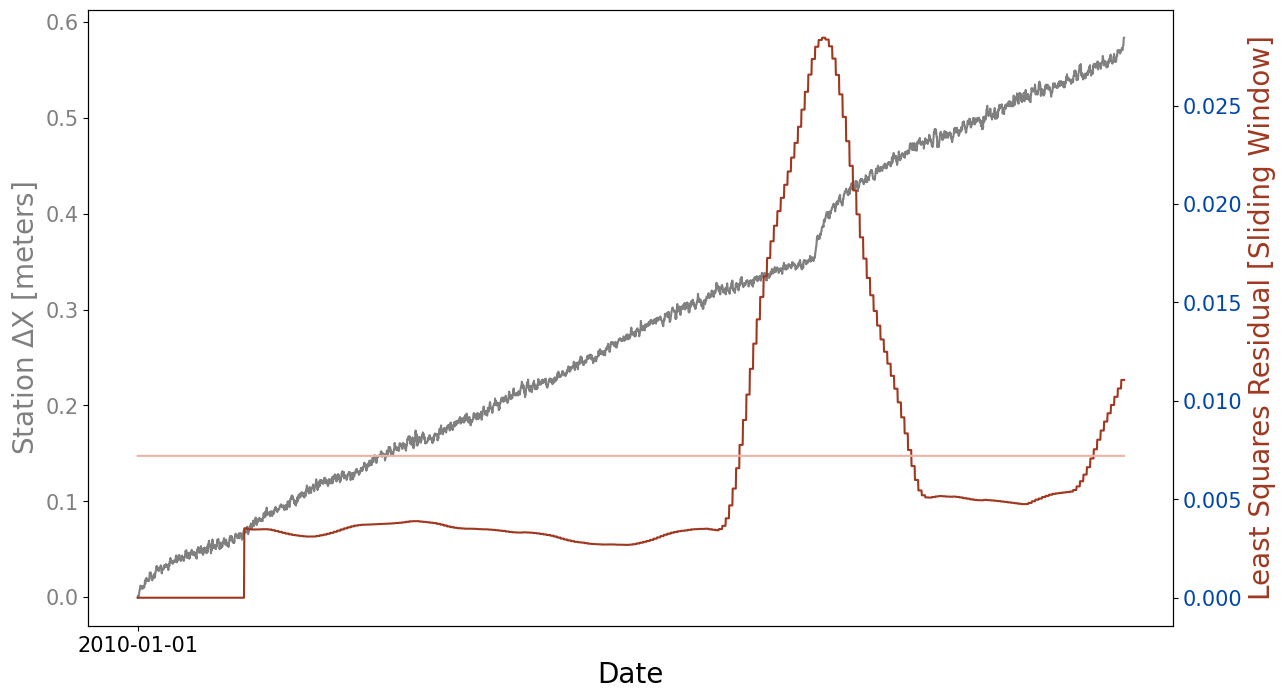

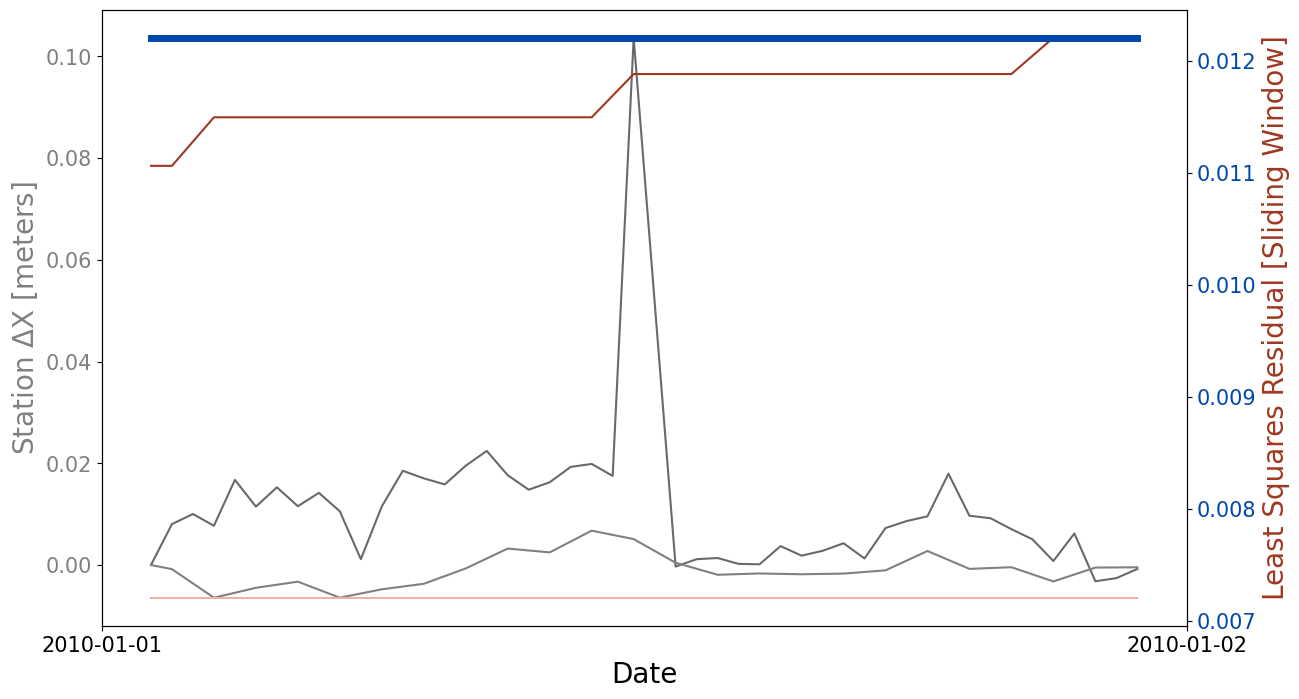

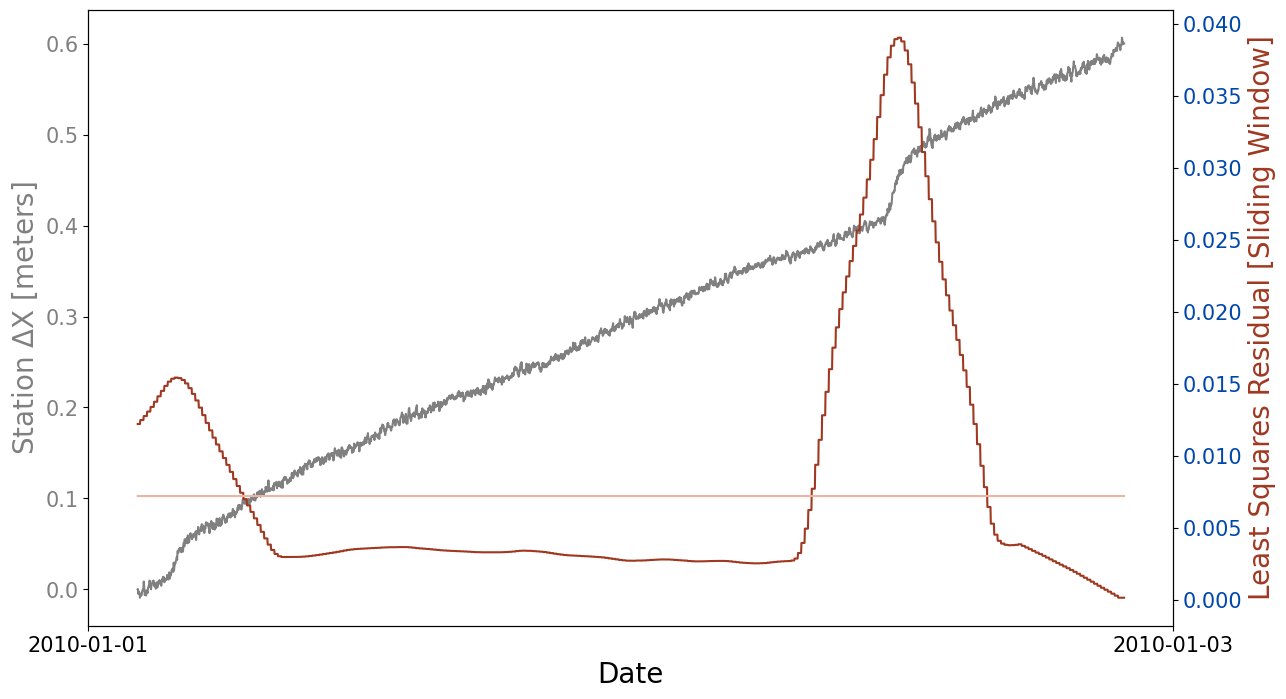

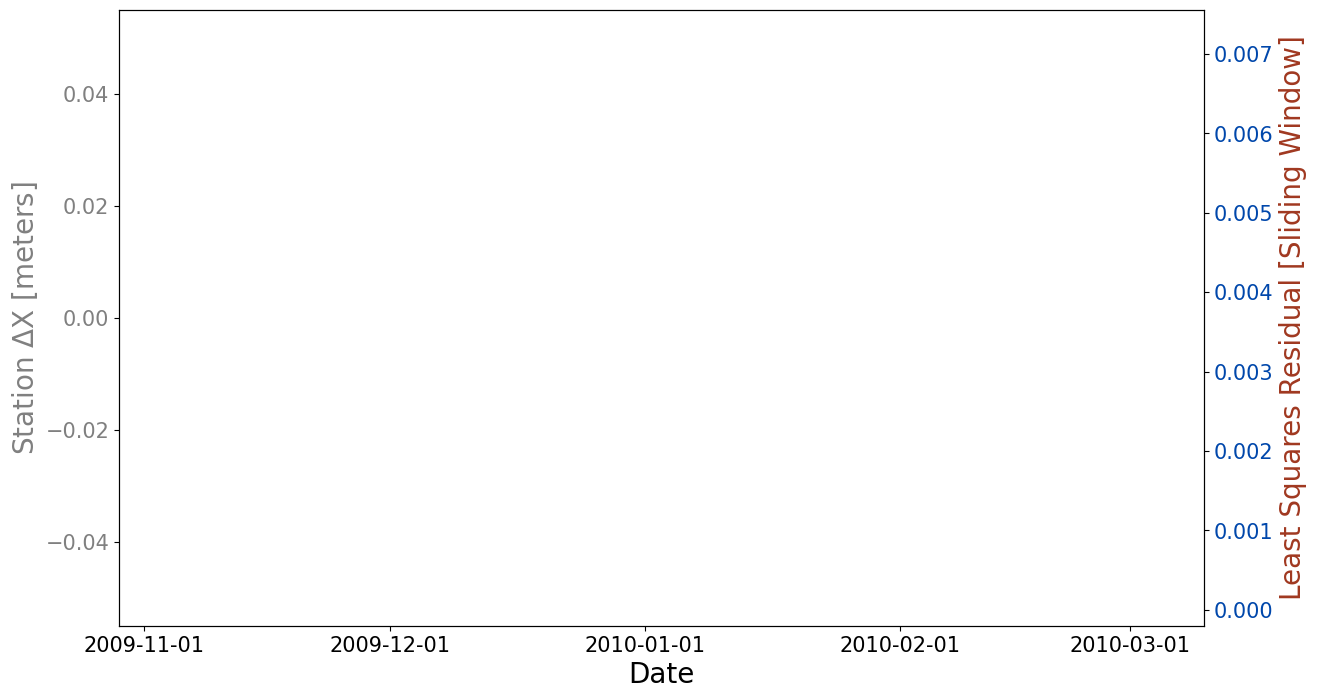

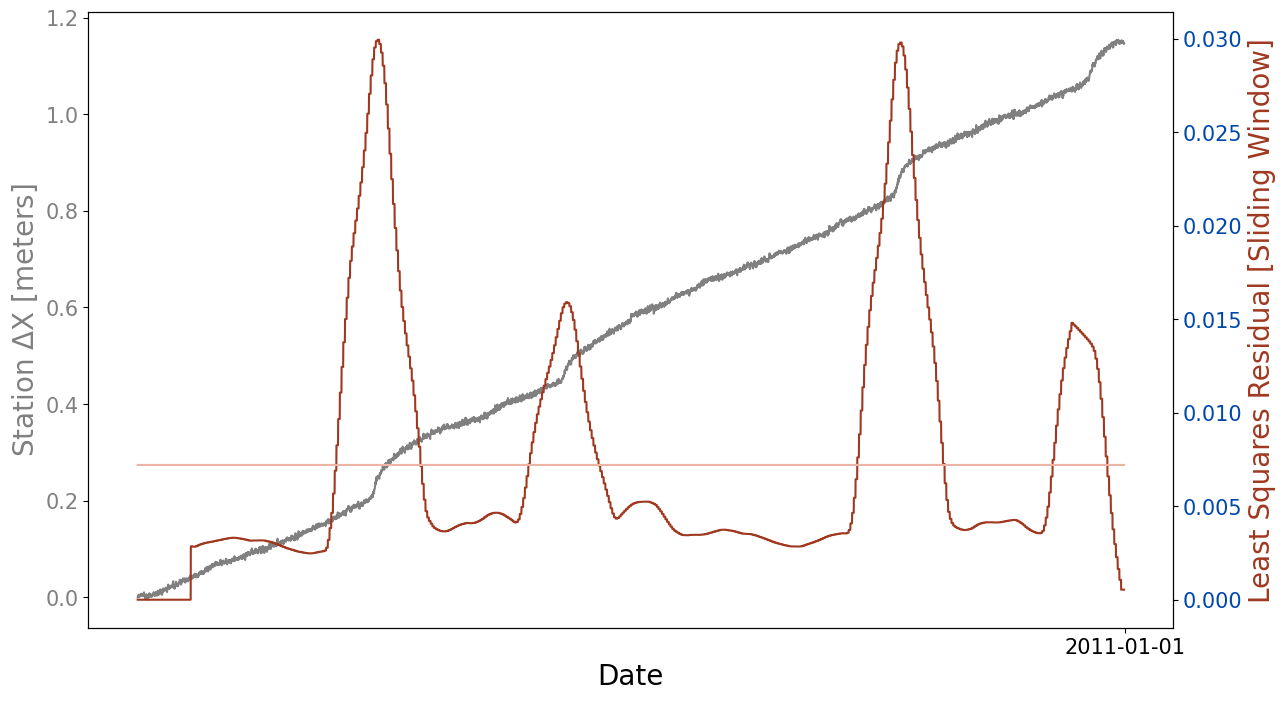

In [3]:
picks = Catalog.Picks(cats)
picks.lls_detection(600, 20)
merged_df = picks.merge()
sorted_list = picks.on_off_list()
print(sorted_list)
picks.no_data_csv(sorted_list)
merged = Catalog.Events(merged_df)
threshold = merged.pick_events(sorted_list, active_stas=2)
print(merged.merged)
indices = merged.on_off_indices(sorted_list)
merged.plot_picking(indices, threshold, num_plots=25)
catalog = merged.make_catalog(cull_time=30, cull_dist=0.1)

for event in catalog[:25]:
    Catalog.plot_event(event)

In [25]:
%reload_ext line_profiler

In [27]:
import os

import src.Catalog.Catalog as Catalog

%lprun
stas = ["la01", "la02", "la05"]
years = ["2010", "2011"]
max_gap_len = 120

cats = []
for sta in stas:
    interpolation_time, run = Catalog.set_interpolation_time(sta, years)
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    # %lprun -f cat.interpolate cat.findgaps(max_gap_len)
    cat.findgaps(max_gap_len)
    cats.append(cat)
picks = Catalog.Picks(cats)

picks.lls_detection(600, 20)
%lprun -f picks.merge picks.merge()
"""
merged_df = picks.merge()
sorted_list = picks.on_off_list()
#print(sorted_list)
picks.no_data_csv(sorted_list)

merged = Catalog.Events(merged_df)
threshold = merged.pick_events(sorted_list, active_stas=2)
indices = merged.on_off_indices(sorted_list)
#merged.plot_picking(indices, threshold, num_plots=25)
catalog = merged.make_catalog(cull_time=30, cull_dist=0.1)
#print(catalog)
#for event in catalog[:25]:
#    Catalog.plot_event(event)
"""

/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:148: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, ind_data], ignore_index=True)


'\nmerged_df = picks.merge()\nsorted_list = picks.on_off_list()\n#print(sorted_list)\npicks.no_data_csv(sorted_list)\n\nmerged = Catalog.Events(merged_df)\nthreshold = merged.pick_events(sorted_list, active_stas=2)\nindices = merged.on_off_indices(sorted_list)\n#merged.plot_picking(indices, threshold, num_plots=25)\ncatalog = merged.make_catalog(cull_time=30, cull_dist=0.1)\n#print(catalog)\n#for event in catalog[:25]:\n#    Catalog.plot_event(event)\n'

Timer unit: 1e-09 s

Total time: 0.180869 s
File: /mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py
Function: merge at line 483

Line #      Hits         Time  Per Hit   % Time  Line Contents
   483                                                   """Make mega dataframe with all traces and Nan if station not operating

In [5]:
print(catalog[0])
x_cols = [col for col in catalog[0] if str(col).endswith("x")]
end_avg = 0
for x_col in x_cols:
    if not np.isnan(catalog[0][x_col].iloc[-1]):
        end_val = (
            catalog[0][x_col].iloc[-1]
            - np.mean(catalog[0][x_col])
            - (catalog[0][x_col].iloc[0] - np.mean(catalog[0][x_col]))
        )
        end_avg += end_val
end_avg /= len(x_cols)
print(end_avg)

                    time          la01x          la01y   la01res  \
8039 2010-12-30 09:30:00 -283558.520544 -560187.128518  0.241180   
8040 2010-12-30 09:30:15 -283558.515666 -560187.135395  0.241180   
8041 2010-12-30 09:30:30 -283558.518794 -560187.135508  0.241180   
8042 2010-12-30 09:30:45 -283558.520763 -560187.139937  0.241180   
8043 2010-12-30 09:31:00 -283558.517268 -560187.134246  0.241180   
...                  ...            ...            ...       ...   
9054 2010-12-30 13:43:45 -283558.132164 -560187.309850  0.319154   
9055 2010-12-30 13:44:00 -283558.131998 -560187.319429  0.319154   
9056 2010-12-30 13:44:15 -283558.136679 -560187.321129  0.319154   
9057 2010-12-30 13:44:30 -283558.137215 -560187.317806  0.319154   
9058 2010-12-30 13:44:45 -283558.139686 -560187.316555  0.319154   

              la02x          la02y   la02res          la05x          la05y  \
8039 -290464.964578 -505310.033271  0.005679 -231688.063551 -585203.209699   
8040 -290464.964628        

In [6]:
import src.Catalog.Catalog as Catalog
import os
import numpy as np

dir = "./tests/ExamplePos"


stas = ["la01"]
years = ["2010", "2011"]
interpolation_time = 15
max_gap_len = 120

cats = []
for sta in stas:
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    cat.findgaps(max_gap_len)
    cats.append(cat)

# Used only for years. Sorted is hand crafted
picks = Catalog.Picks(cats)

# Test no gaps
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2011-12-31 23:59:45"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, False],
    "station": ["la02", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data.empty

# Test gap at start
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-03-01 00:00:00"),
        pd.to_datetime("2011-12-31 23:59:45"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, False],
    "station": ["la02", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data["start"].iloc[0] == pd.to_datetime("2010-01-01 00:00:00")
assert df_no_data["end"].iloc[0] == pd.to_datetime("2010-03-01 00:00:00")

# Test gap at end
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2011-10-23 12:50:15"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, False],
    "station": ["la02", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data["start"].iloc[0] == pd.to_datetime("2011-10-23 12:50:15")
assert df_no_data["end"].iloc[0] == pd.to_datetime("2011-12-31 23:59:45")

# Test gap at both ends
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-03-01 00:00:00"),
        pd.to_datetime("2011-10-23 12:50:15"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, False],
    "station": ["la02", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data["start"].iloc[0] == pd.to_datetime("2010-01-01 00:00:00")
assert df_no_data["end"].iloc[0] == pd.to_datetime("2010-03-01 00:00:00")
assert df_no_data["start"].iloc[-1] == pd.to_datetime("2011-10-23 12:50:15")
assert df_no_data["end"].iloc[-1] == pd.to_datetime("2011-12-31 23:59:45")

# Test gap in middle
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-05-01 00:00:00"),
        pd.to_datetime("2011-03-01 00:00:00"),
        pd.to_datetime("2011-12-31 23:59:45"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, True, False, False],
    "station": ["la02", "la01", "la01", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data["start"].iloc[0] == pd.to_datetime("2010-05-01 00:00:00")
assert df_no_data["end"].iloc[0] == pd.to_datetime("2011-03-01 00:00:00")

# Test gap in middle and end
d = {
    "times": [
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-01-01 00:00:00"),
        pd.to_datetime("2010-05-01 00:00:00"),
        pd.to_datetime("2011-03-01 00:00:00"),
        pd.to_datetime("2011-10-23 12:50:15"),
        pd.to_datetime("2011-12-31 23:59:45"),
    ],
    "onset": [True, True, False, True, False, False],
    "station": ["la02", "la01", "la01", "la01", "la02", "la01"],
}
sorted = pd.DataFrame(data=d)
df_no_data = picks.no_data_csv(sorted)
assert df_no_data["start"].iloc[0] == pd.to_datetime("2010-05-01 00:00:00")
assert df_no_data["end"].iloc[0] == pd.to_datetime("2011-03-01 00:00:00")
assert df_no_data["start"].iloc[-1] == pd.to_datetime("2011-10-23 12:50:15")
assert df_no_data["end"].iloc[-1] == pd.to_datetime("2011-12-31 23:59:45")

/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:148: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, ind_data], ignore_index=True)


In [16]:
print(picks.stas[0].residuals[0])
print(picks.stas[1].residuals[0])

[0.         0.         0.         ... 0.09096306 0.09096306 0.09096306]
[0.         0.         0.         ... 0.00067425 0.00067425 0.00067425]


In [8]:
catalog = CatWrap.full_catalog_run(
    cats,
    years,
    window=600,
    slide=20,
    active_stas=2,
    cull_time=30,
    cull_dist=0.1,
    plot=True,
)

for event in catalog[:25]:
    Catalog.plot_event(event)

2010-12-30 00:00:00 2011-01-01 00:14:45
2011-01-01 00:22:30 2011-01-01 19:54:15
2011-01-01 20:59:15 2011-01-01 23:54:15
2011-01-01 23:59:45 2011-01-01 23:59:45


IndexError: list index out of range

In [3]:
import src.Catalog.Catalog as Catalog
import os

dir = "./tests/ExamplePos"
stas = ["la01", "la05"]
years = ["2010", "2011"]
interpolation_time = 15
max_gap_len = 120

cats = []
for sta in stas:
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    cat.findgaps(interpolation_time, max_gap_len)
    cats.append(cat)

picks = Catalog.Picks(cats)
picks.lls_detection(600, 25)
merged = picks.merge()
sorted_list = picks.on_off_list()
picks.no_data_csv(sorted_list)
indices = picks.on_off_indices(merged, sorted_list)

merged, threshold = picks.pick_events(merged, sorted_list, active_stas=2)
picks.plot_picking(merged, indices, threshold, num_plots=4)

catalog = picks.make_catalog(merged, cull_time=30)
save_dir = f"./{years[0]}_{years[-1]}Events"
picks.save_catalog(catalog, save_dir)

for event in catalog[:2]:
    Catalog.plot_event(event)

/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:148: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, ind_data], ignore_index=True)


TypeError: Datastream.findgaps() takes 2 positional arguments but 3 were given

In [10]:
# ANOTHER TEST WITH LA02 at 30 second intervals
import logging
import src.Catalog.CatalogWrapper as CatWrap
import src.Catalog.Catalog as Catalog
import os

dir = "/mnt/d/csrs_2024/all"
year_arr = [["2010"]]
max_gap_len = 120
stas = ["la02", "la01"]
# Currently implemented: ERROR, WARNING, INFO, DEBUG
# Each level also includes all levels above it.
loglevel = "DEBUG"


# fmt: on
########################## User Defined Variables ##############################
################################################################################
def set_log_level(loglevel: str) -> None:
    """Set logging level for the run

    Parameters
    ----------
    loglevel : str
        Logging level
    """
    FORMAT = "%(asctime)s %(name)s %(levelname)s: %(message)s"
    DATEFMT = "%Y-%m-%d %H:%M:%S"
    if loglevel == "ERROR":
        logging.basicConfig(
            format=FORMAT, datefmt=DATEFMT, level=logging.ERROR, force=True
        )
    elif loglevel == "WARNING":
        logging.basicConfig(
            format=FORMAT, datefmt=DATEFMT, level=logging.WARNING, force=True
        )
    elif loglevel == "INFO":
        logging.basicConfig(
            format=FORMAT, datefmt=DATEFMT, level=logging.INFO, force=True
        )
    elif loglevel == "DEBUG":
        logging.basicConfig(
            format=FORMAT, datefmt=DATEFMT, level=logging.DEBUG, force=True
        )

In [12]:
# Setup logger
set_log_level(loglevel)
logger = logging.getLogger(__name__)

# Create Catalog
for years in year_arr:
    cats = []
    for sta in stas:
        interpolation_time, run = Catalog.set_interpolation_time(sta, years)
        if run:
            logger.info(f"Creating Dataframe for {sta}")
            cat = Catalog.Datastream(
                os.path.join(dir, sta), sta, years, interpolation_time
            )
            logger.info(f"Interpolating {sta}")
            cat.findgaps(max_gap_len)
            cats.append(cat)

    picks = Catalog.Picks(cats)
    picks.lls_detection(600, 25)
    merged_df = picks.merge()
    sorted_list = picks.on_off_list()
    picks.no_data_csv(sorted_list)

    merged = Catalog.Events(merged_df)
    indices = picks.on_off_indices(merged, sorted_list)

    merged, threshold = picks.pick_events(merged, sorted_list, active_stas=2)
    picks.plot_picking(merged, indices, threshold, num_plots=4)

    catalog = picks.make_catalog(merged, cull_time=30)
    # save_dir = f"./{years[0]}_{years[-1]}Events"
    # picks.save_catalog(catalog, save_dir)

    for event in catalog[:2]:
        Catalog.plot_event(event)

2024-08-23 10:32:41 __main__ INFO: Creating Dataframe for la02
2024-08-23 10:32:57 __main__ INFO: Interpolating la02
2024-08-23 10:32:59 src.Catalog.Catalog DEBUG: 2010-04-03 04:48:30 2010-04-03 04:50:00 0 days 00:01:30
2024-08-23 10:33:00 src.Catalog.Catalog DEBUG: 2010-04-29 23:33:00 2010-04-29 23:34:30 0 days 00:01:30
2024-08-23 10:33:00 src.Catalog.Catalog DEBUG: 2010-04-29 23:35:00 2010-04-29 23:36:30 0 days 00:01:30
2024-08-23 10:33:03 src.Catalog.Catalog DEBUG: 2010-10-05 16:00:30 2010-10-05 16:02:30 0 days 00:02:00
2024-08-23 10:33:06 __main__ INFO: Creating Dataframe for la01
2024-08-23 10:33:17 __main__ INFO: Interpolating la01
2024-08-23 10:33:22 src.Catalog.Catalog DEBUG: 2010-04-03 04:48:45 2010-04-03 04:49:30 0 days 00:00:45
2024-08-23 10:33:23 src.Catalog.Catalog DEBUG: 2010-04-29 23:28:45 2010-04-29 23:30:00 0 days 00:01:15
2024-08-23 10:33:24 src.Catalog.Catalog DEBUG: 2010-04-29 23:33:15 2010-04-29 23:34:30 0 days 00:01:15
2024-08-23 10:33:24 src.Catalog.Catalog DEBUG

AttributeError: 'Picks' object has no attribute 'on_off_indices'

In [54]:
# Make input text file for pretty GMT plot of the least squares residual and threshold
# DO NOT NEED TO RUN CELL
# Plot residual sum, threshold, and all active traces [Don't need to run cell]
thresh = 1
x_cols = ["la01x", "la05x"]


for i, index in enumerate(indices[:25]):
    if i > 0:
        if indices[i - 1] != indices[i]:
            start = indices[i - 1]
            end = index
            if i == 21:
                df = pd.DataFrame()
                time = merged["time"][start:end]
                df.insert(len(df.columns), "Time", time)
                for j, x_col in enumerate(x_cols):
                    x_j = (
                        merged[x_col][start:end]
                        - np.mean(merged[x_col][start:end])
                        - np.ones_like(merged[x_col][start:end])
                        * (merged[x_col][start] - np.mean(merged[x_col][start:end]))
                    )
                    if not np.isnan(x_j.iloc[0]):
                        df.insert(len(df.columns), x_col, x_j)
                ressum = merged["ressum"][start:end]
                thres = np.ones_like(merged["ressum"][start:end]) * thresh
                event = merged["event"][start:end]
                df.insert(len(df.columns), "Ressum", ressum)
                df.insert(len(df.columns), "Threshold", thres)
                df.insert(len(df.columns), "Event", event)
                print(df)
                df.to_csv("LeastSquaresGMT.txt", sep="\t", index=False)

                      Time     gz01x     gz14x     gz15x     la01x     la04x  \
133725 2013-01-24 05:11:15  0.000000  0.000000  0.000000  0.000000  0.000000   
133726 2013-01-24 05:11:30  0.002558  0.001666  0.002080  0.001187  0.000579   
133727 2013-01-24 05:11:45  0.002135 -0.000992  0.003134  0.001201  0.001394   
133728 2013-01-24 05:12:00  0.002059 -0.002913  0.004345  0.000416  0.002294   
133729 2013-01-24 05:12:15  0.007420  0.002064  0.011182  0.007327  0.009460   
...                    ...       ...       ...       ...       ...       ...   
161311 2013-01-29 00:07:45  3.474645  3.527580  3.530037  4.415894  3.871221   
161312 2013-01-29 00:08:00  3.471125  3.526630  3.532112  4.416304  3.866557   
161313 2013-01-29 00:08:15  3.470889  3.529472  3.533239  4.411059  3.866553   
161314 2013-01-29 00:08:30  3.471383  3.528683  3.535955  4.415049  3.866673   
161315 2013-01-29 00:08:45  3.476582  3.534729  3.540760  4.420003  3.871277   

           la06x     la07x     la08x   

In [16]:
"""
# List event start and end times in decimal year format for comparison with Matt's catalog allslip20150415.dat
print("StartTime", "EndTime", sep="\t")
for event in rev_catalog:
    start = event.iloc[0]["time"]
    end = event.iloc[-1]["time"]
    start_dec = pyasl.decimalYear(start)
    end_dec = pyasl.decimalYear(end)
    print(start_dec, end_dec, sep="\t")
"""

StartTime	EndTime
2010.040153633942	2010.040593131659
2010.0416081621004	2010.0417732115677
2010.0430469939117	2010.0434032534247
2010.0456035958905	2010.0460659246576
2010.0468959284626	2010.0472284056316
2010.0484836377473	2010.0488945966515
2010.0510378614915	2010.051491628615
2010.0536991057838	2010.0541504946727
2010.0557933789955	2010.056233828006
2010.0569796423135	2010.0573715753424
2010.0584579528158	2010.0588736681887
2010.0597398211569	2010.060118436073
2010.0612276445966	2010.0616352739726
2010.0624771689497	2010.062856259513
2010.064031107306	2010.064438736682
2010.0652501902587	2010.0656159627092
2010.0668402777778	2010.0672474315068
2010.0680636415525	2010.068397545662
2010.0696927321158	2010.0701098744291
2010.0708485540335	2010.0711444063927
2010.072629851598	2010.073057458143
2010.0754765981735	2010.0759470129376
2010.0764707001522	2010.0768269596651
2010.0782472412482	2010.0786819824962
2010.0792993721461	2010.0796570585997
2010.0811096841705	2010.0815372907155
2010.